In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(1, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(2, (3, 3), activation='relu', input_shape=(15, 15, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(4, (3, 3), activation='relu', input_shape=(6, 6, 3)),
    layers.Flatten(),
    layers.Dense(24, activation='relu'),
    layers.Dense(10)  # Output layer with 10 classes
])



# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 30, 30, 1)      │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 13, 13, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 4)        │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,934 (7.55 KB)

 Trainable params: 1,934 (7.55 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))



Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1152 - loss: 2.2972 - val_accuracy: 0.1880 - val_loss: 2.1821
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1986 - loss: 2.1527 - val_accuracy: 0.2562 - val_loss: 1.9925
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2788 - loss: 1.9318 - val_accuracy: 0.3152 - val_loss: 1.8324
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3225 - loss: 1.8251 - val_accuracy: 0.3373 - val_loss: 1.7652
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3345 - loss: 1.7817 - val_accuracy: 0.3501 - val_loss: 1.7439
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3453 - loss: 1.7650 - val_accuracy: 0.3578 - val_loss: 1.7365
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3583 - loss: 1.7331 - val_accuracy: 0.3689 - val_loss: 1.7078
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3577 - loss: 1.

KeyboardInterrupt: 

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3997 - loss: 1.6448
Test accuracy: 0.3969


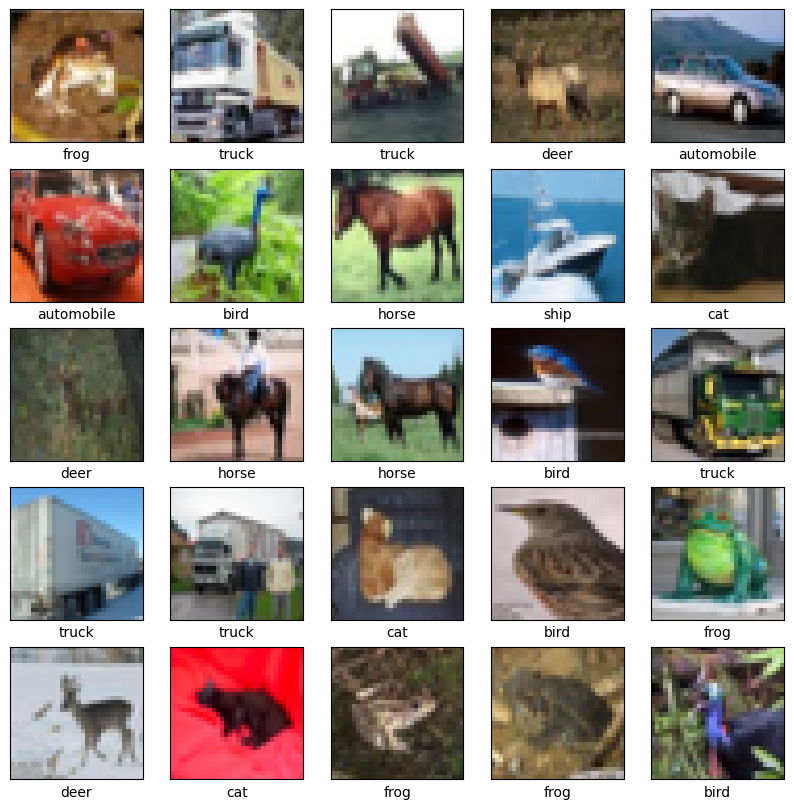

In [18]:
# Get the trained weights
trained_weights = model.get_weights()

# Display the first 25 images from the training set
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [19]:
trained_weights

[array([[[[ 0.13836661],
          [ 0.0261885 ],
          [-0.09354327]],
 
         [[ 0.28085232],
          [ 0.03894808],
          [-0.02894186]],
 
         [[ 0.50794625],
          [-0.30138656],
          [-0.08484389]]],
 
 
        [[[-0.26846325],
          [ 0.24603777],
          [ 0.37443373]],
 
         [[-0.06976673],
          [-0.02778885],
          [ 0.04387548]],
 
         [[-0.20977698],
          [ 0.05995449],
          [ 0.10000945]]],
 
 
        [[[-0.06433674],
          [-0.03100484],
          [-0.11139431]],
 
         [[-0.06141597],
          [-0.17010622],
          [ 0.02855911]],
 
         [[-0.28858176],
          [-0.17082019],
          [ 0.20094684]]]], dtype=float32),
 array([2.0665572], dtype=float32),
 array([[[[-0.11229189,  0.04131587]],
 
         [[ 0.17110914,  0.0181172 ]],
 
         [[-0.0827421 ,  0.02747046]]],
 
 
        [[[ 0.07193542,  0.01828994]],
 
         [[ 0.00613302, -0.00033962]],
 
         [[-0.08048694, -0.03802

In [20]:
# Array representation of trained weights
for layer in model.layers:
    if hasattr(layer, 'weights'):
        print(f"Weights for {layer.name}: {layer.weights}")


Weights for conv2d_21: [<KerasVariable shape=(3, 3, 3, 1), dtype=float32, path=sequential_7/conv2d_21/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_7/conv2d_21/bias>]
Weights for max_pooling2d_16: []
Weights for conv2d_22: [<KerasVariable shape=(3, 3, 1, 2), dtype=float32, path=sequential_7/conv2d_22/kernel>, <KerasVariable shape=(2,), dtype=float32, path=sequential_7/conv2d_22/bias>]
Weights for max_pooling2d_17: []
Weights for conv2d_23: [<KerasVariable shape=(3, 3, 2, 4), dtype=float32, path=sequential_7/conv2d_23/kernel>, <KerasVariable shape=(4,), dtype=float32, path=sequential_7/conv2d_23/bias>]
Weights for flatten_7: []
Weights for dense_12: [<KerasVariable shape=(64, 24), dtype=float32, path=sequential_7/dense_12/kernel>, <KerasVariable shape=(24,), dtype=float32, path=sequential_7/dense_12/bias>]
Weights for dense_13: [<KerasVariable shape=(24, 10), dtype=float32, path=sequential_7/dense_13/kernel>, <KerasVariable shape=(10,), dtype=float32, path=sequentia

In [21]:
model.layers

[<Conv2D name=conv2d_21, built=True>,
 <MaxPooling2D name=max_pooling2d_16, built=True>,
 <Conv2D name=conv2d_22, built=True>,
 <MaxPooling2D name=max_pooling2d_17, built=True>,
 <Conv2D name=conv2d_23, built=True>,
 <Flatten name=flatten_7, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>]

In [20]:
for layer in model.layers:
    try:
        print(f"The weights of the layer {layer} are:")
        print((layer.get_weights()[0]).tolist()) # weights
        print((layer.get_weights()[1]).tolist()) # biases
        
    except IndexError:
        print(f"The layer {layer} has no weights")

The weights of the layer <Conv2D name=conv2d, built=True> are:
[[[[-0.08596936613321304, -0.04840327054262161, 0.30927181243896484, 0.022340448573231697, -0.07471703737974167, 0.05296900123357773, 0.06840457767248154, -0.1083817332983017, -0.03281934931874275, -0.1620335429906845, 0.18962113559246063, 0.09620772302150726, -0.13324305415153503, 0.18205371499061584, 0.12572963535785675, -0.18853868544101715, -0.07168503850698471, 0.07550032436847687, 0.09619099646806717, 0.10967749357223511, 0.07249319553375244, 0.10695834457874298, -0.037772297859191895, -0.04683719575405121, -0.20072439312934875, -0.02564818598330021, 0.24605269730091095, -0.06329580396413803, -0.13727732002735138, -0.08991151303052902, -0.3273839056491852, 0.05932817608118057], [-0.15191391110420227, -0.10493959486484528, 0.19978655874729156, 0.08401038497686386, 0.11407667398452759, 0.12914519011974335, 0.1820325255393982, -0.07712069898843765, 0.004469160921871662, -0.08498238772153854, -0.032217152416706085, 0.0401

In [22]:
# Writing the weights of individual layers to a file
for layer in model.layers:
    try:
        with open(f"small{layer.name}_weights.txt", 'w') as f:
            f.write(str((layer.get_weights()[0].astype('int8').tolist())))
        with open(f"small{layer.name}_biases.txt", 'w') as f:
            f.write(str(list(map(int,(layer.get_weights()[1].tolist())))))
            print("Shape of weights: ", layer.get_weights()[0].shape)
            print("Shape of biases: ", layer.get_weights()[1].shape)
    except IndexError:
        print(f"The layer {layer} has no weights")

Shape of weights:  (3, 3, 3, 1)
Shape of biases:  (1,)
The layer <MaxPooling2D name=max_pooling2d_16, built=True> has no weights
Shape of weights:  (3, 3, 1, 2)
Shape of biases:  (2,)
The layer <MaxPooling2D name=max_pooling2d_17, built=True> has no weights
Shape of weights:  (3, 3, 2, 4)
Shape of biases:  (4,)
The layer <Flatten name=flatten_7, built=True> has no weights
Shape of weights:  (64, 24)
Shape of biases:  (24,)
Shape of weights:  (24, 10)
Shape of biases:  (10,)
